## K-Nearest Neighbors:
#### This ML algorithm finds a collection of the k-nearest neighbors and uses this information to classify a data point
#### Euclidean Distance is calculated from our input to every point in the training set
#### With very large datasets, calculating this value may take very long
#### Works on Linear and Non-Linear datasets
* However, this can be heavily threaded to improve performance
#### The following four cells use sklean's k nearest neighbors to test out this method on a UCI dataset

In [4]:
import numpy as np
from sklearn import preprocessing, model_selection, neighbors
import pandas as pd

In [21]:
df = pd.read_csv('breast-cancer-wisconsin.txt')
df.replace('?', -999999, inplace=True)
df.drop(['id'], axis=1, inplace=True)

Removing the class column as it is the label

In [18]:
X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [19]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
print(acc)

0.9714285714285714


/Users/kahshiuh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
example_measures = np.array([8,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(len(example_measures), -1)
pred = clf.predict(example_measures)

TypeError: array() got an unexpected keyword argument 'keepdims'

In [27]:
print(pred)

[2]


In [28]:
from math import sqrt
def euclidean_distance(p1, p2):
    return sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

euclidean_distance([1,3], [2,5])

2.23606797749979

In [29]:
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

The double nested for loop plots every point in both k and r set
It will plot plots from both sides a different color

[[<matplotlib.collections.PathCollection at 0x7fdda81c2850>,

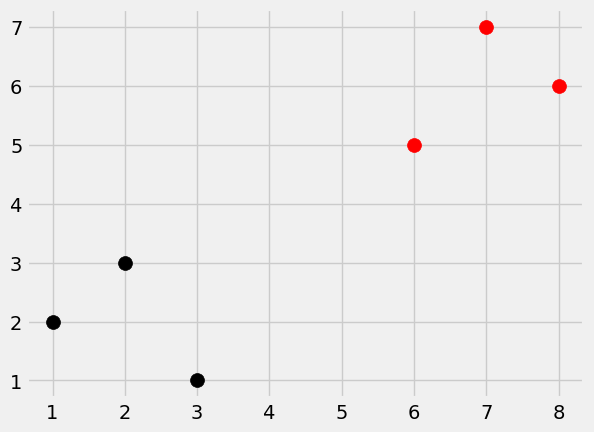

In [37]:
data = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]
[[plt.scatter(ii[0], ii[1], s= 100, color=i) for ii in data[i]] for i in data]

#### Our own k-nearest neighbors function

###### Not very fast as it is not threaded

###### The Steps:
* Find Euclidean distance from every point to our test point
    * Uses the norm of the vector instead of actual Euclidean Distance Formula
* Add it to the distance list
* From that list, we sort it from least the greatest and take the first k distances (2D array)
* Then we can use Counter to find the most popular votes
    * Similar to how voting would work
* Confidence measures how uniform the distribution of the voters is
    * Higher confidence means that the k-closest neighbors were mostly a part of one group
    * Lower confidence means that there are a lot of voting parties

In [57]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to value less than total voting groups')
    distances=[]
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    return result, confidence
res = k_nearest_neighbors(data, new_features, k=3);

/var/folders/pw/0cjrcmjj58q0s780404b1jdc0000gn/T/ipykernel_91742/385102188.py:3: UserWarning: K is set to value less than total voting groups
  warnings.warn('K is set to value less than total voting groups')


TypeError: list indices must be integers or slices, not float

Following two cells divides up the data we have into a train and test set
The third cell runs our algorithm on every vector in the test set and sees how well the classification is

In [48]:
import random
df = pd.read_csv('breast-cancer-wisconsin.txt')
df.replace('?', -999999, inplace=True)
df.drop(['id'], axis=1, inplace=True)
full_data  = df.astype(float).values.tolist()
random.shuffle(full_data)

In [59]:
test_size = 0.5
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [60]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=10)
        if group == vote:
            correct += 1
        else:
            print(confidence)
        total += 1
print(correct/total)

0.9
0.9
0.9
1.0
0.8
0.9
0.6
0.9
0.8
0.5
0.7
0.6
0.9656160458452722
